# 유방암 데이터셋 시각화

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.data)

In [4]:
colors = ['blue', 'red']
target_names = data.target_names
target_colors = {target_names[i]: colors[i] for i in range(len(target_names))}
target = data.target
labels = [target_names[i] for i in target]
colors = [target_colors[label] for label in labels]

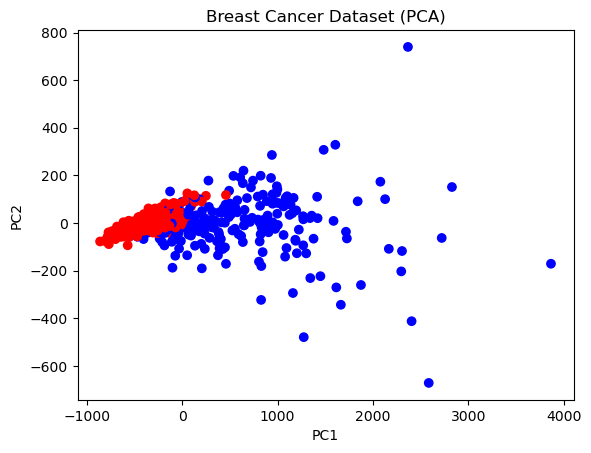

In [5]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer Dataset (PCA)')
plt.show()

## 선형 분류

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=np.append(data['feature_names'], ['target']))

print(df.head())
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [10]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[ 59   4]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



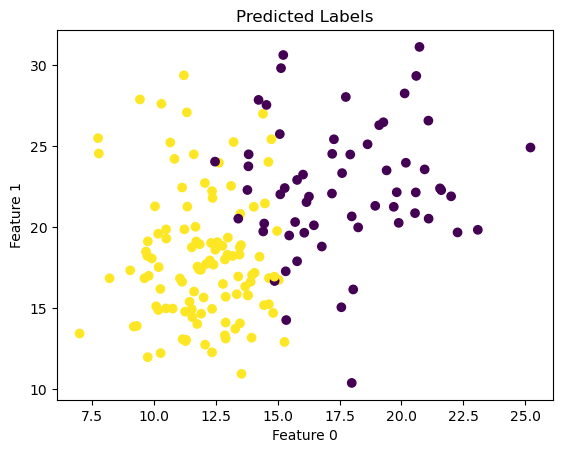

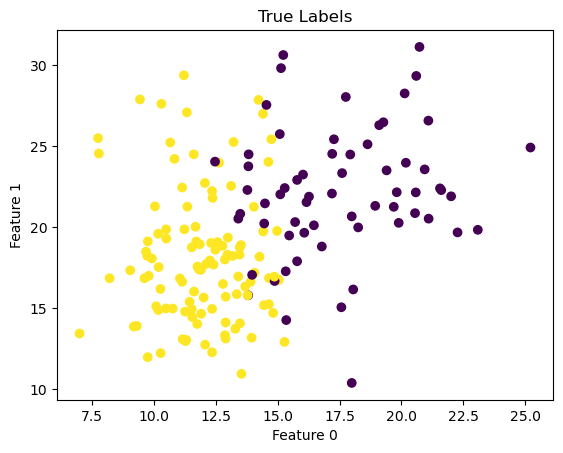

In [12]:
y_pred_test = svm_model.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Predicted Labels')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('True Labels')
plt.show()